In [2]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import framenet as fn
import pandas as pd
import seaborn as sns

nltk.download("wordnet")
nltk.download("framenet_v17")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package framenet_v17 to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!


True

# Lexical Units

In [3]:
lexical_units = fn.lus()
lu_names = list(set(map(lambda x: x.name, lexical_units)))

print("Total unique lexical units: {}".format(len(lu_names)))

Total unique lexical units: 10462


In [4]:
lu_frames = { key: set() for key in lu_names }
    
for lu in lexical_units:
    lu_frames[lu.name].add(lu.frame.name)
    
multi_frame_units = []
for name, frames in lu_frames.items():
    if len(frames) > 1:
        multi_frame_units.append(name)
    
print("Lexical units with more than 1 frame: {}".format(len(multi_frame_units)))

Lexical units with more than 1 frame: 1987


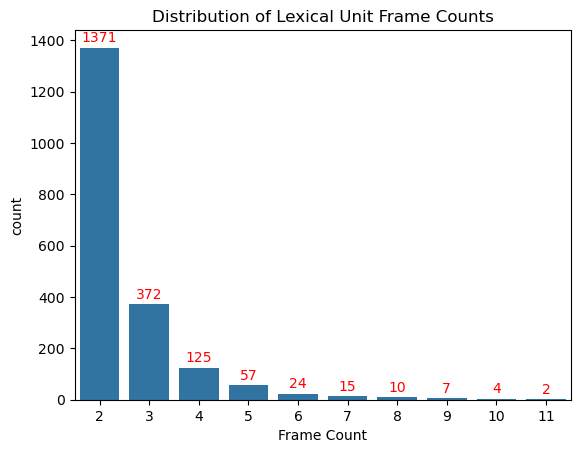

In [5]:
df_lu = pd.DataFrame({
    "Lexical Unit": multi_frame_units,
    "Frame Count": list(map(lambda x: len(lu_frames[x]), multi_frame_units))
})

sns.countplot(df_lu, x = "Frame Count")
plt.title("Distribution of Lexical Unit Frame Counts")

counts = df_lu["Frame Count"].value_counts()
for i, cnt in enumerate(counts):
    plt.annotate(
        str(cnt),
        (i, cnt),
        textcoords = "offset points",
        xytext = (0, 4),
        ha = "center",
        color = "red"
    )

plt.show()

In [6]:
df_lu["Frame"] = list(map(lambda x: list(lu_frames[x]), multi_frame_units))
df_lu = df_lu.explode("Frame", ignore_index = True)

df_lu

,Lexical Unit,Frame Count,Frame
0,faith.n,2,Religious_belief
1,faith.n,2,Trust
2,degree.n,3,Quantity
3,degree.n,3,Quantified_mass
4,degree.n,3,Rank
...,...,...,...
5092,connect.v,3,Relating_concepts
5093,evacuate.v,4,Escaping
5094,evacuate.v,4,Excreting
5095,evacuate.v,4,Removing


In [7]:
all_sentences = []

for i, row in df_lu.iterrows():
    lexical_unit = row["Lexical Unit"]
    frame = row["Frame"]
    sentences = []
    for lu in fn.lus(lexical_unit, frame):
        for sentence in lu.exemplars:
            sentences.append(sentence.text)
    all_sentences.append(sentences)

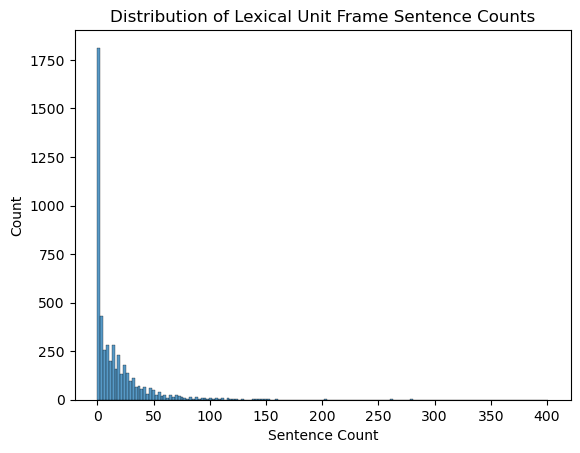

In [8]:
df_lu["Sentence Count"] = list(map(lambda x: len(x), all_sentences))

sns.histplot(df_lu, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Frame Sentence Counts")

plt.show()

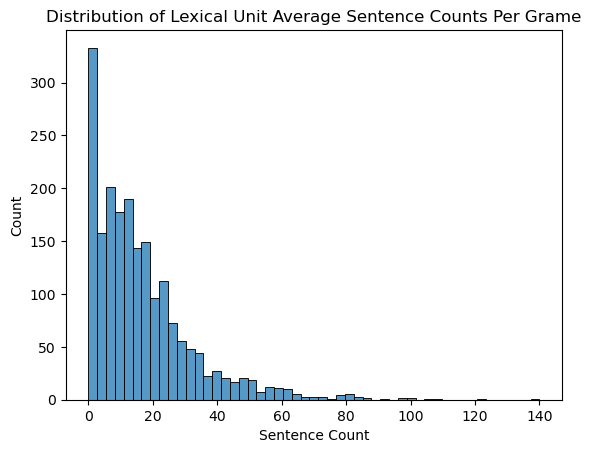

In [9]:
df_lu_grp = df_lu.groupby("Lexical Unit").mean(numeric_only = True).reset_index()

sns.histplot(df_lu_grp, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Average Sentence Counts Per Grame")

plt.show()

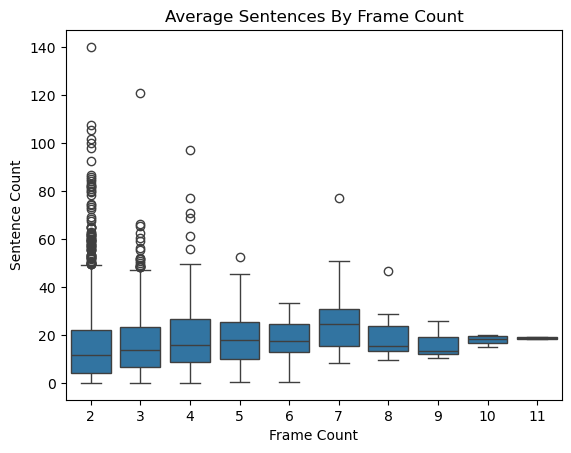

In [10]:
df_lu_grp["Frame Count"] = df_lu_grp["Frame Count"].astype(int)

sns.boxplot(df_lu_grp, x = "Frame Count", y = "Sentence Count")
plt.title("Average Sentences By Frame Count")

plt.show()

In [11]:
df_lu_grp.groupby("Frame Count").describe()

Sentence Count                                              \
                     count       mean        std        min        25%   
Frame Count                                                              
2                   1371.0  16.086069  16.936611   0.000000   4.000000   
3                    372.0  16.858423  14.684247   0.000000   6.666667   
4                    125.0  19.706000  16.181620   0.000000   8.750000   
5                     57.0  19.171930  11.645566   0.400000  10.000000   
6                     24.0  18.312500   8.910222   0.333333  13.041667   
7                     15.0  26.780952  17.793918   8.142857  15.357143   
8                     10.0  19.812500  11.216811   9.500000  13.343750   
9                      7.0  16.000000   6.113468  10.333333  11.944444   
10                     4.0  17.900000   2.198484  15.100000  16.675000   
11                     2.0  18.727273   0.642824  18.272727  18.500000   

                                               
                   50%        75%         max  
Frame Count                                    
2            11.500000  22.000000  140.000000  
3            13.666667  23.333333  121.000000  
4            16.000000  26.750000   97.000000  
5            18.000000  25.200000   52.400000  
6            17.416667  24.666667   33.500000  
7            24.428571  31.000000   77.000000  
8            15.250000  23.875000   46.750000  
9            13.444444  19.277778   25.777778  
10           18.350000  19.575000   19.800000  
11           18.727273  18.954545   19.181818

In [12]:
df_lu["Sentence"] = all_sentences
df_lu = df_lu.explode("Sentence")
df_lu.to_csv("../datasets/lexical_unit_sentences.csv", index = False)

df_lu

,Lexical Unit,Frame Count,Frame,Sentence Count,Sentence
0,faith.n,2,Religious_belief,0,NaN
1,faith.n,2,Trust,1,Legend has it that a local woman climbed the h...
2,degree.n,3,Quantity,0,NaN
3,degree.n,3,Quantified_mass,29,Specialist labour or industrial correspondents...
3,degree.n,3,Quantified_mass,29,The incremental approach has also been known t...
...,...,...,...,...,...
5096,evacuate.v,4,Emptying,6,Some nearby buildings have also been evacuated...
5096,evacuate.v,4,Emptying,6,The government of the Maldives has decided to ...
5096,evacuate.v,4,Emptying,6,Let us assume you wish to evacuate the nightcl...
5096,evacuate.v,4,Emptying,6,"The fire brigade reappeared , bringing them so..."


# Frame Elements

In [13]:
frame_elements = set()

for frame in fn.frames():
    for elem in frame.FE.values():
        frame_elements.add(elem.name)
        
frame_elements = list(frame_elements)
print("Total unique frame elements: {}".format(len(frame_elements)))

Total unique frame elements: 1285


In [14]:
fe_sentences = { key: [] for key in frame_elements }

for frame in fn.frames():
    for elem in frame.FE.values():
        for lu in frame.lexUnit.values():
            for sentence in lu.exemplars:
                for annotation_set in sentence.annotationSet:
                    if annotation_set.layer:
                        for layer in annotation_set.layer:
                            if layer.name == "FE":
                                for x in layer.label:
                                    if x.name == elem.name:
                                        fe_sentences[elem.name].append(sentence.text)
                                        break
                                break

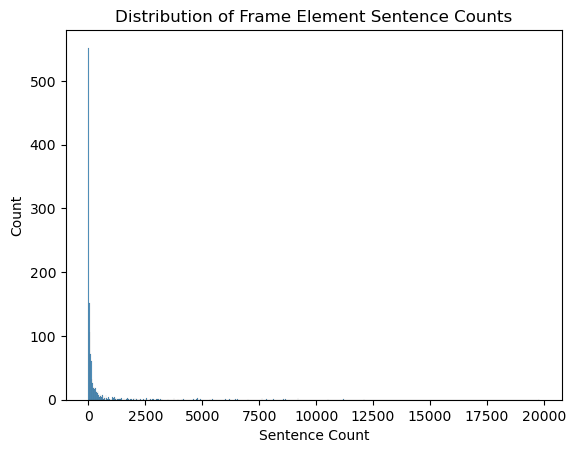

In [15]:
df_fe = pd.DataFrame({
    "Frame Element": list(frame_elements),
    "Sentence Count": list(map(lambda x: len(fe_sentences[x]), frame_elements))
})

sns.histplot(df_fe, x = "Sentence Count")
plt.title("Distribution of Frame Element Sentence Counts")

plt.show()

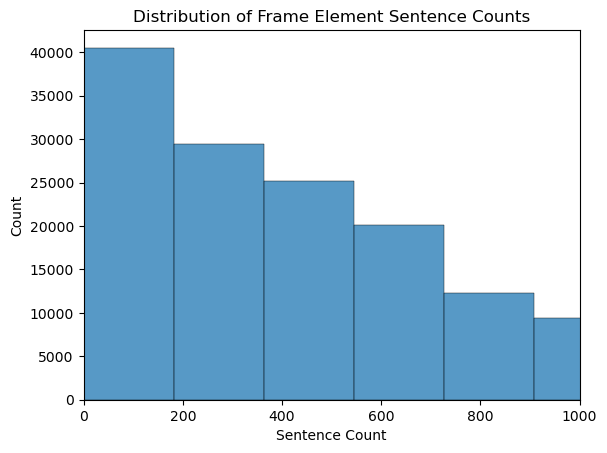

In [17]:
sns.histplot(df_fe, x = "Sentence Count")
plt.title("Distribution of Frame Element Sentence Counts")
plt.xlim(0, 1000)

plt.show()

In [16]:
df_fe["Sentence"] = list(map(lambda x: list(fe_sentences[x]), frame_elements))
df_fe = df_fe.explode("Sentence")
df_fe.to_csv("../datasets/frame_element_sentences.csv", index = False)

df_fe

,Frame Element,Sentence Count,Sentence
0,Speaker,11189,"In its evidence in chief , the prosecution nee..."
0,Speaker,11189,If the parties wish to adduce evidence in supp...
0,Speaker,11189,TNC adduces arguments for a broad and balanced...
0,Speaker,11189,The respondent may also adduce argument .
0,Speaker,11189,( This appears to be the only independent supp...
...,...,...,...
1284,Initial_correlate,34,"But the economic boom , coupled with rising in..."
1284,Initial_correlate,34,The government 's opinion-poll rating has edge...
1284,Initial_correlate,34,Changing weather conditions also helped firefi...
1284,Initial_correlate,34,"Since the early 1970s , however , catches have..."
